<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/02_Avg%2C_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
import warnings
import re
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('outlier_dataset.csv')

In [25]:
df.head()

,x1,y
0,15.488135,14.236548
1,17.151894,16.458941
2,16.027634,14.375872
3,15.448832,18.917730
4,1.139401,108.474556


In [26]:
px.scatter(df, x='x1', y='y')

RMSE: 79.09227168449162


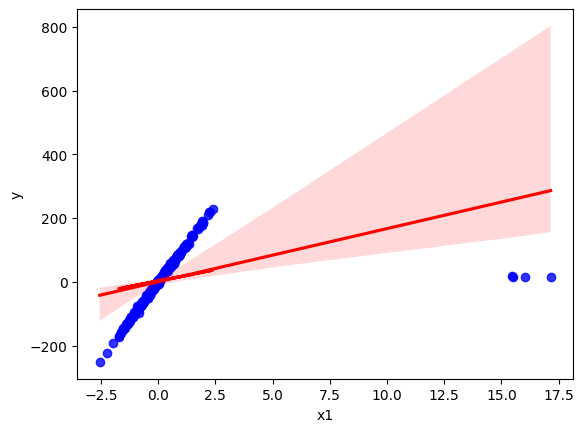

In [27]:
X = df[['x1']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(x_train, y_train)

y_pred = elastic.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.show()

RMSE: 91.77576744575744


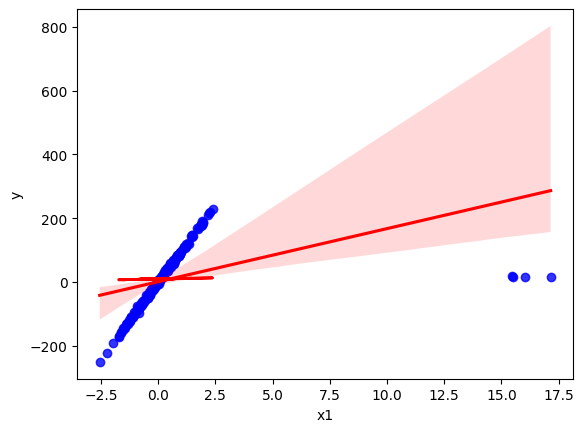

In [35]:
ridge = Ridge(alpha=10000)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.show()

RMSE: 93.27267976131172


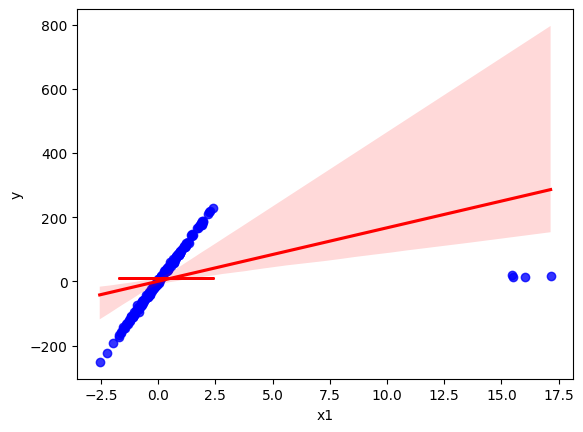

In [37]:
X = df[['x1']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=1000)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()